# Projeto 2: Construindo um dashboard
Vimos que é possível construir gráficos dinâmicos em aula.

Agora é a oportunidade de juntar o que aprendemos de pandas, seaborn, e plotly. Integrando num dashboard que será hospedado no streamlit.

## Objetivo:
- Construir um dashboard dinâmico com dados de interesse
    - Ações
    - Casos de COVID
    - Viagens da Uber
    - Qualquer tipo de dados!
- Aplicar boas práticas de desenvolvimento com pandas e gráficos
- Escolher a palheta de cor adequada
- Escolher gráficos adequados
- Criar uma estória para o usuário com os dados  

## Objetivo extra

- Publicar o dash

Como publicar o dash? [https://docs.streamlit.io/en/stable/deploy_streamlit_app.html](https://docs.streamlit.io/en/stable/deploy_streamlit_app.html)

Não precisamos criar 10 gráficos distintos, ou um com muitas informações. As vezes um ou dois gráficos já é o suficiente para passar a mensagem de forma objetiva!

- Link do streamlit: [https://streamlit.io/](https://streamlit.io/)  

A documentação é bem detalhada! Olhe com atenção e veja as possibilidades de botões, filtros e gráficos.  
[https://docs.streamlit.io/en/stable/](https://docs.streamlit.io/en/stable/)



## Dados:
`yfinance` modulo para extração de valores de ações.

- [https://data.world/datasets/uber](https://data.world/datasets/uber)

- [https://ourworldindata.org/](https://ourworldindata.org/https://ourworldindata.org/)


---
# Dados escolhidos: consumo de álcool vs expectativa de vida ao nascer saudável vs religião por país

- [Our World in Data: Alcohol Consumption](https://ourworldindata.org/alcohol-consumption)
- [Kaggle - Alcohol & Life Expectancy](https://www.kaggle.com/rishidamarla/alcohol-life-expectancy)
- [Fivethirtyeight - Data & code](https://github.com/fivethirtyeight/data)
- [Dados de Religião por país das Nações Unidas](https://data.un.org/Data.aspx?d=POP&f=tableCode%3A28)

In [1]:
import pandas as pd
import numpy as np

## Qualidade de vida

In [2]:
# importando qualidade de vida
dflifeexp = pd.read_csv('datasets/lifeexpectancy-verbose.csv')
dflifeexp

GhoCode                                       GhoDisplay  \
0     WHOSIS_000001                 Life expectancy at birth (years)   
1     WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
2     WHOSIS_000001                 Life expectancy at birth (years)   
3     WHOSIS_000001                 Life expectancy at birth (years)   
4     WHOSIS_000015                Life expectancy at age 60 (years)   
...             ...                                              ...   
6403  WHOSIS_000001                 Life expectancy at birth (years)   
6404  WHOSIS_000015                Life expectancy at age 60 (years)   
6405  WHOSIS_000001                 Life expectancy at birth (years)   
6406  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
6407  WHOSIS_000001                 Life expectancy at birth (years)   

     PublishStateCode PublishStateDisplay  YearCode  YearDisplay RegionCode  \
0           PUBLISHED           Published      1990         1990        AMR   
1           PUBLISHED           Published      2012         2012        EUR   
2           PUBLISHED           Published      2000         2000        EMR   
3           PUBLISHED           Published      2000         2000        AFR   
4           PUBLISHED           Published      1990         1990       SEAR   
...               ...                 ...       ...          ...        ...   
6403        PUBLISHED           Published      2000         2000        EMR   
6404        PUBLISHED           Published      1990         1990        WPR   
6405        PUBLISHED           Published      1990         1990        AFR   
6406        PUBLISHED           Published      2012         2012        EUR   
6407        PUBLISHED           Published      2013         2013        EUR   

              RegionDisplay WorldBankIncomeGroupGroupCode  \
0                  Americas                        WB_LMI   
1                    Europe                         WB_HI   
2     Eastern Mediterranean                         WB_LI   
3                    Africa                        WB_LMI   
4           South_East Asia                        WB_LMI   
...                     ...                           ...   
6403  Eastern Mediterranean                        WB_LMI   
6404        Western Pacific                        WB_UMI   
6405                 Africa                         WB_LI   
6406                 Europe                        WB_LMI   
6407                 Europe                           NaN   

     WorldBankIncomeGroupDisplay CountryCode CountryDisplay SexCode  \
0            Lower_middle_income         NIC      Nicaragua     MLE   
1                    High_income         IRL        Ireland     MLE   
2                     Low_income         YEM          Yemen    BTSX   
3            Lower_middle_income         NGA        Nigeria    FMLE   
4            Lower_middle_income         THA       Thailand    FMLE   
...                          ...         ...            ...     ...   
6403         Lower_middle_income         MAR        Morocco    BTSX   
6404         Upper_middle_income         PLW          Palau    BTSX   
6405                  Low_income         BFA   Burkina Faso    FMLE   
6406         Lower_middle_income         ALB        Albania     MLE   
6407                         NaN         ARM        Armenia    BTSX   

      SexDisplay  DisplayValue   Numeric  
0           Male            68  68.00000  
1           Male            69  69.30000  
2     Both sexes            61  61.00000  
3         Female            48  48.00000  
4         Female            19  19.00000  
...          ...           ...       ...  
6403  Both sexes            68  68.00000  
6404  Both sexes            16  16.00000  
6405      Female            51  51.00000  
6406        Male            64  63.50000  
6407  Both sexes            71  71.02699  

[6408 rows x 16 columns]

In [3]:
dflifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                        6408 non-null   o

In [4]:
dflifeexp[dflifeexp.CountryCode == 'NIC']

GhoCode                                       GhoDisplay  \
0     WHOSIS_000001                 Life expectancy at birth (years)   
344   WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
578   WHOSIS_000001                 Life expectancy at birth (years)   
1130  WHOSIS_000001                 Life expectancy at birth (years)   
1257  WHOSIS_000001                 Life expectancy at birth (years)   
1967  WHOSIS_000015                Life expectancy at age 60 (years)   
2258  WHOSIS_000015                Life expectancy at age 60 (years)   
2383  WHOSIS_000015                Life expectancy at age 60 (years)   
2478  WHOSIS_000001                 Life expectancy at birth (years)   
2538  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
2692  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
2804  WHOSIS_000015                Life expectancy at age 60 (years)   
2819  WHOSIS_000015                Life expectancy at age 60 (years)   
3004  WHOSIS_000001                 Life expectancy at birth (years)   
3178  WHOSIS_000001                 Life expectancy at birth (years)   
3412  WHOSIS_000015                Life expectancy at age 60 (years)   
3469  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
3745  WHOSIS_000015                Life expectancy at age 60 (years)   
3766  WHOSIS_000015                Life expectancy at age 60 (years)   
4174  WHOSIS_000015                Life expectancy at age 60 (years)   
4228  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
4327  WHOSIS_000015                Life expectancy at age 60 (years)   
4333  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
4439  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
4454  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
4691  WHOSIS_000015                Life expectancy at age 60 (years)   
4721  WHOSIS_000015                Life expectancy at age 60 (years)   
4930  WHOSIS_000001                 Life expectancy at birth (years)   
5319  WHOSIS_000001                 Life expectancy at birth (years)   
5926  WHOSIS_000001                 Life expectancy at birth (years)   
6048  WHOSIS_000001                 Life expectancy at birth (years)   
6314  WHOSIS_000001                 Life expectancy at birth (years)   
6394  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   

     PublishStateCode PublishStateDisplay  YearCode  YearDisplay RegionCode  \
0           PUBLISHED           Published      1990         1990        AMR   
344         PUBLISHED           Published      2013         2013        AMR   
578         PUBLISHED           Published      1990         1990        AMR   
1130        PUBLISHED           Published      2000         2000        AMR   
1257        PUBLISHED           Published      2000         2000        AMR   
1967        PUBLISHED           Published      2000         2000        AMR   
2258        PUBLISHED           Published      2000         2000        AMR   
2383        PUBLISHED           Published      2000         2000        AMR   
2478        PUBLISHED           Published      2012         2012        AMR   
2538        PUBLISHED           Published      2012         2012        AMR   
2692        PUBLISHED           Published      2012         2012        AMR   
2804        PUBLISHED           Published      2012         2012        AMR   
2819        PUBLISHED           Published      1990         1990        AMR   
3004        PUBLISHED           Published      2013         2013        AMR   
3178        PUBLISHED           Published      2013         2013        AMR   
3412        PUBLISHED           Published      2013         2013        AMR   
3469        PUBLISHED           Published      2000         2000        AMR   
3745        PUBLISHED           Published      2013         2013        AMR   
3766        PUBLISHED           Published      2012         20

In [5]:
dflifeexp.GhoDisplay.unique()

array(['Life expectancy at birth (years)',
       'Healthy life expectancy (HALE) at birth (years)',
       'Life expectancy at age 60 (years)'], dtype=object)

In [6]:
dflifeexp[(dflifeexp.GhoCode == 'WHOSIS_000001') & (dflifeexp.CountryCode == 'NIC')]

GhoCode                        GhoDisplay PublishStateCode  \
0     WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
578   WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
1130  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
1257  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
2478  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
3004  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
3178  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
4930  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
5319  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
5926  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
6048  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   
6314  WHOSIS_000001  Life expectancy at birth (years)        PUBLISHED   

     PublishStateDisplay  YearCode  YearDisplay RegionCode RegionDisplay  \
0              Published      1990         1990        AMR      Americas   
578            Published      1990         1990        AMR      Americas   
1130           Published      2000         2000        AMR      Americas   
1257           Published      2000         2000        AMR      Americas   
2478           Published      2012         2012        AMR      Americas   
3004           Published      2013         2013        AMR      Americas   
3178           Published      2013         2013        AMR      Americas   
4930           Published      1990         1990        AMR      Americas   
5319           Published      2012         2012        AMR      Americas   
5926           Published      2013         2013        AMR      Americas   
6048           Published      2000         2000        AMR      Americas   
6314           Published      2012         2012        AMR      Americas   

     WorldBankIncomeGroupGroupCode WorldBankIncomeGroupDisplay CountryCode  \
0                           WB_LMI         Lower_middle_income         NIC   
578                         WB_LMI         Lower_middle_income         NIC   
1130                        WB_LMI         Lower_middle_income         NIC   
1257                        WB_LMI         Lower_middle_income         NIC   
2478                        WB_LMI         Lower_middle_income         NIC   
3004                           NaN                         NaN         NIC   
3178                           NaN                         NaN         NIC   
4930                        WB_LMI         Lower_middle_income         NIC   
5319                        WB_LMI         Lower_middle_income         NIC   
5926                           NaN                         NaN         NIC   
6048                        WB_LMI         Lower_middle_income         NIC   
6314                        WB_LMI         Lower_middle_income         NIC   

     CountryDisplay SexCode  SexDisplay  DisplayValue   Numeric  
0         Nicaragua     MLE        Male            68  68.00000  
578       Nicaragua    FMLE      Female            74  74.00000  
1130      Nicaragua    FMLE      Female            76  76.00000  
1257      Nicaragua     MLE        Male            70  70.00000  
2478      Nicaragua     MLE        Male            70  70.00000  
3004      Nicaragua     MLE        Male            71  70.73053  
3178      Nicaragua    FMLE      Female            77  76.62982  
4930      Nicaragua    BTSX  Both sexes            71  71.00000  
5319      Nicaragua    BTSX  Both sexes            73  73.00000  
5926      Nicaragua    BTSX  Both sexes            74  73.64848  
6048      Nicaragua    BTSX  Both sexes            73  73.00000  
6314      Nicaragua    FMLE      Female            76  76.00000

In [7]:
dflifeexp.groupby('CountryDisplay')['SexDisplay'].nunique().sort_values() < 3

CountryDisplay
Afghanistan    False
Niger          False
Nigeria        False
Niue           False
Norway         False
               ...  
Grenada        False
Guatemala      False
Guinea         False
Denmark        False
Zimbabwe       False
Name: SexDisplay, Length: 194, dtype: bool

Vamos pegar somente o valor de expectativa de vida do último ano

(possibilidade de melhora: talvez a análise fique melhor se tivermos os dados de todos os anos e fizéssemos um `pandas.merge_asof` com o ano)

In [8]:
df_ultimo_ano = dflifeexp[(dflifeexp.SexCode == 'BTSX') & (dflifeexp.GhoCode == 'WHOSIS_000002')].sort_values(by = 'YearCode', ascending = False)
df_ultimo_ano

GhoCode                                       GhoDisplay  \
3141  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
4653  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
4857  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
2670  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
1564  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
...             ...                                              ...   
1383  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
5008  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
4161  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
5026  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   
3952  WHOSIS_000002  Healthy life expectancy (HALE) at birth (years)   

     PublishStateCode PublishStateDisplay  YearCode  YearDisplay RegionCode  \
3141        PUBLISHED           Published      2013         2013        AMR   
4653        PUBLISHED           Published      2013         2013        EMR   
4857        PUBLISHED           Published      2013         2013        AFR   
2670        PUBLISHED           Published      2013         2013        AMR   
1564        PUBLISHED           Published      2013         2013        EUR   
...               ...                 ...       ...          ...        ...   
1383        PUBLISHED           Published      2000         2000        AFR   
5008        PUBLISHED           Published      2000         2000        WPR   
4161        PUBLISHED           Published      2000         2000        EUR   
5026        PUBLISHED           Published      2000         2000        EUR   
3952        PUBLISHED           Published      2000         2000        EMR   

              RegionDisplay WorldBankIncomeGroupGroupCode  \
3141               Americas                        WB_LMI   
4653  Eastern Mediterranean                         WB_HI   
4857                 Africa                         WB_LI   
2670               Americas                        WB_LMI   
1564                 Europe                         WB_HI   
...                     ...                           ...   
1383                 Africa                        WB_UMI   
5008        Western Pacific                        WB_LMI   
4161                 Europe                        WB_LMI   
5026                 Europe                         WB_HI   
3952  Eastern Mediterranean                         WB_LI   

     WorldBankIncomeGroupDisplay CountryCode CountryDisplay SexCode  \
3141         Lower_middle_income         GUY         Guyana    BTSX   
4653                 High_income         OMN           Oman    BTSX   
4857                  Low_income         ERI        Eritrea    BTSX   
2670         Lower_middle_income         PRY       Paraguay    BTSX   
1564                 High_income         ISL        Iceland    BTSX   
...                          ...         ...            ...     ...   
1383         Upper_middle_income         NAM        Namibia    BTSX   
5008         Lower_middle_income         MNG       Mongolia    BTSX   
4161         Lower_middle_income         GEO        Georgia    BTSX   
5026                 High_income         MCO         Monaco    BTSX   
3952                  Low_income         SSD    South Sudan    BTSX   

      SexDisplay  DisplayValue  Numeric  
3141  Both sexes            54     54.4  
4653  Both sexes            66     66.0  
4857  Both sexes            55     54.5  
2670  Both sexes            65     64.7  
1564  Both sexes            72     72.2  
...          ...           ...      ...  
1383  Both sexes            49     49.1  
5008  Both sexes            55     55.5  
4161  Both sexes            63     62.8  
5026  Both sexes            70     70.3  
3952  Both sexes            42     42.0  

[584 rows x 16 columns]

In [9]:
# como está ordenado pelo ano em ordem descendente, o 'first' pega o último ano com dados válidos
# (em contraste, o .nth(0) pegaria o último ano, tendo ele dados válidos ou não)

# dfle = df_ultimo_ano.groupby('CountryDisplay')[['CountryCode', 'RegionDisplay', 'YearDisplay', 'WorldBankIncomeGroupDisplay', 'Numeric']].first()
dfle = df_ultimo_ano.groupby('CountryDisplay')[['CountryCode', 'RegionDisplay', 'YearDisplay', 'WorldBankIncomeGroupDisplay', 'Numeric']].agg('first')
dfle = dfle.reset_index().rename(columns = {
    'CountryDisplay': 'Country',
    'RegionDisplay': 'Region',
    'YearDisplay': 'Year',
    'WorldBankIncomeGroupDisplay': 'IncomeGroup',
    'Numeric': 'LifeExp'
})
dfle.head(10)

Country CountryCode                 Region  Year  \
0          Afghanistan         AFG  Eastern Mediterranean  2013   
1              Albania         ALB                 Europe  2013   
2              Algeria         DZA                 Africa  2013   
3              Andorra         AND                 Europe  2013   
4               Angola         AGO                 Africa  2013   
5  Antigua and Barbuda         ATG               Americas  2013   
6            Argentina         ARG               Americas  2013   
7              Armenia         ARM                 Europe  2013   
8            Australia         AUS        Western Pacific  2013   
9              Austria         AUT                 Europe  2013   

           IncomeGroup  LifeExp  
0           Low_income     50.0  
1  Lower_middle_income     64.8  
2  Upper_middle_income     62.4  
3          High_income     71.8  
4  Lower_middle_income     44.5  
5          High_income     64.1  
6  Upper_middle_income     66.7  
7  Lower_middle_income     62.4  
8          High_income     72.6  
9          High_income     70.6

In [10]:
dfle.Region.unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South_East Asia'], dtype=object)

## Consumo de bebidas alcoolicas por ano (por país) 

In [11]:
import pandas as pd

dfbeer_raw = pd.read_csv('datasets/beer-consumption-per-person.csv')
dfbeer_raw.sample(5)

Entity Code  Year  \
6149      Panama  PAN  1995   
2432     Ecuador  ECU  2001   
834        Benin  BEN  1997   
4735  Luxembourg  LUX  2001   
8733   Venezuela  VEN  2010   

      Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Beer  
6149                                               3.60                                                           
2432                                               1.50                                                           
834                                                0.58                                                           
4735                                               4.43                                                           
8733                                               5.43

In [12]:
dfbeer = dfbeer_raw.rename(columns = {
    'Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Beer': 'Beer_LitersAlcPerYear'
})
dfbeer['Beer_LitersPerYear'] = dfbeer['Beer_LitersAlcPerYear'] / 0.05  # 100 L de cerveja = 5 L de álcool (+- 5% de álcool em volume)

In [13]:
dfwine_raw = pd.read_csv('datasets/wine-consumption-per-person.csv')
dfwine_raw.sample(5)

Entity Code  Year  \
8893    Zambia  ZMB  2008   
6689    Rwanda  RWA  2002   
8935  Zimbabwe  ZWE  1997   
5436   Myanmar  MMR  1976   
5283  Mongolia  MNG  1986   

      Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Wine  
8893                                               0.04                                                           
6689                                               0.00                                                           
8935                                               0.05                                                           
5436                                               0.00                                                           
5283                                               0.00

In [14]:
dfwine = dfwine_raw.rename(columns = {
    'Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Wine': 'Wine_LitersAlcPerYear'
})
dfwine['Wine_LitersPerYear'] = dfwine['Wine_LitersAlcPerYear'] / 0.12  # 100 garrafas de 75 cL de vinho = 9 L de álcool (+- 12% de álcool em volume)

In [15]:
dfspirits_raw = pd.read_csv('datasets/spirits-consumption-per-person.csv')
dfspirits_raw.sample(5)

Entity Code  Year  \
287       Argentina  ARG  1968   
4893       Malaysia  MYS  2000   
385       Australia  AUS  1987   
3332  Guinea-Bissau  GNB  1970   
4599        Liberia  LBR  1991   

      Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Spirits  
287                                                1.98                                                              
4893                                               0.08                                                              
385                                                1.65                                                              
3332                                               1.04                                                              
4599                                               4.47

In [16]:
dfspirits = dfspirits_raw.rename(columns = {
    'Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Spirits': 'Spirits_LitersAlcPerYear'
})
dfspirits['Spirits_LitersPerYear'] = dfspirits['Spirits_LitersAlcPerYear'] / 0.4  # vodca contém +- 40% alcool por volume

In [17]:
# obs: não faz diferença usarmos how = 'inner' vs how = 'outer', visto que todos os DFs tem os mesmos países

dfalc_intermediate = dfbeer.merge(dfwine, on = ['Code', 'Year'], how = 'inner', suffixes = ('', '_y'))
dfalc = dfalc_intermediate.drop(columns = 'Entity_y').merge(dfspirits, on = ['Code', 'Year'], how = 'inner', suffixes = ('', '_y')).drop(columns = 'Entity_y')
dfalc['Total_LitersAlcPerYear'] = dfalc[[ f'{c}_LitersAlcPerYear' for c in ['Beer', 'Wine', 'Spirits'] ]].sum(axis=1)
dfalc.to_csv('datasets/alcool-tratado.csv')
dfalc.sample(5)

Entity Code  Year  Beer_LitersAlcPerYear  \
6538                  Qatar  QAT  2012                   0.33   
6733  Saint Kitts and Nevis  KNA  1997                   2.51   
3106                  Ghana  GHA  1979                   0.37   
1377                 Canada  CAN  1970                   4.40   
809                   Benin  BEN  1973                   0.63   

      Beer_LitersPerYear  Wine_LitersAlcPerYear  Wine_LitersPerYear  \
6538                 6.6                   0.12            1.000000   
6733                50.2                   0.60            5.000000   
3106                 7.4                   0.01            0.083333   
1377                88.0                   0.51            4.250000   
809                 12.6                   0.16            1.333333   

      Spirits_LitersAlcPerYear  Spirits_LitersPerYear  Total_LitersAlcPerYear  
6538                      0.68                  1.700                    1.13  
6733                      2.39                  5.975                    5.50  
3106                      0.07                  0.175                    0.45  
1377                      2.57                  6.425                    7.48  
809                       0.23                  0.575                    1.02

## Religião dominante por país

In [18]:
# religiao

dfrel_raw = pd.read_csv('datasets/religiao.csv')
dfrel = dfrel_raw.copy()
dfrel.head(5)

Country or Area  Year   Area         Sex     Religion  \
0         Albania  2011  Total  Both Sexes        Total   
1         Albania  2011  Total  Both Sexes      Atheist   
2         Albania  2011  Total  Both Sexes     Catholic   
3         Albania  2011  Total  Both Sexes  Evangelical   
4         Albania  2011  Total  Both Sexes       Muslim   

                              Record Type             Reliability  \
0  Census - de jure - complete tabulation  Final figure, complete   
1  Census - de jure - complete tabulation  Final figure, complete   
2  Census - de jure - complete tabulation  Final figure, complete   
3  Census - de jure - complete tabulation  Final figure, complete   
4  Census - de jure - complete tabulation  Final figure, complete   

   Source Year      Value Value Footnotes  
0         2013  2800138.0             NaN  
1         2013    69995.0             NaN  
2         2013   280921.0             NaN  
3         2013     3797.0             NaN  
4         2013  1587608.0             NaN

In [19]:
dfrel_raw.Area.unique()

array(['Total', 'Urban', 'Rural'], dtype=object)

In [20]:
rels = dfrel_raw.Religion.unique()
dfrel_raw.Religion[dfrel_raw.Religion.str.lower().str.contains('catholic')].unique()

array(['Catholic', 'Roman Catholic', 'Old Catholic Church',
       'Brasilian Apostolic Catholic', 'Orthodox Catholic',
       'Roman Apostolic Catholic', 'Other Catholic', 'Ukrainian Catholic',
       'Polish National Catholic Church', 'Greek Catholic',
       'Russian Catholic Orthodox Church',
       'Ukrainian Greek-Catholic Church', 'Lapsed Roman Catholic',
       'Liberal Catholic', 'Byzantine Catholic Church',
       'Cong giao - Catholic'], dtype=object)

In [21]:
# corrigindo alguns valores que são repetidos, mas escritos de outra forma
correcao_rel = { 
    'Roman Catholic' : ['Catholic', 'Christian', 'Roman Apostolic Catholic' ],
    'Muslim': ['Islam']
}
correcao_map = {}
for corr_rel, rels_lst in correcao_rel.items():
    for velha_rel in rels_lst:
        correcao_map.update({ velha_rel: corr_rel })

dfrel['Religion'] = dfrel['Religion'].replace(correcao_map)
dfrel.head(5)

Country or Area  Year   Area         Sex        Religion  \
0         Albania  2011  Total  Both Sexes           Total   
1         Albania  2011  Total  Both Sexes         Atheist   
2         Albania  2011  Total  Both Sexes  Roman Catholic   
3         Albania  2011  Total  Both Sexes     Evangelical   
4         Albania  2011  Total  Both Sexes          Muslim   

                              Record Type             Reliability  \
0  Census - de jure - complete tabulation  Final figure, complete   
1  Census - de jure - complete tabulation  Final figure, complete   
2  Census - de jure - complete tabulation  Final figure, complete   
3  Census - de jure - complete tabulation  Final figure, complete   
4  Census - de jure - complete tabulation  Final figure, complete   

   Source Year      Value Value Footnotes  
0         2013  2800138.0             NaN  
1         2013    69995.0             NaN  
2         2013   280921.0             NaN  
3         2013     3797.0             NaN  
4         2013  1587608.0             NaN

In [22]:
rel_mask = (
    (dfrel['Reliability'] == 'Final figure, complete')
    #& dfrel_raw['Record Type'] == 'Census - de jure - complete tabulation')
    & (dfrel['Sex'] == 'Both Sexes')
    & (dfrel['Area'] == 'Total')
)

In [23]:
dfrel[rel_mask & (dfrel['Country or Area'] == 'Albania') & (dfrel.Year == 2011)]

Country or Area  Year   Area         Sex                        Religion  \
0          Albania  2011  Total  Both Sexes                           Total   
1          Albania  2011  Total  Both Sexes                         Atheist   
2          Albania  2011  Total  Both Sexes                  Roman Catholic   
3          Albania  2011  Total  Both Sexes                     Evangelical   
4          Albania  2011  Total  Both Sexes                          Muslim   
5          Albania  2011  Total  Both Sexes                        Orthodox   
6          Albania  2011  Total  Both Sexes                           Other   
7          Albania  2011  Total  Both Sexes                Other Christians   
8          Albania  2011  Total  Both Sexes               Refused to answer   
9          Albania  2011  Total  Both Sexes                      Bektashism   
10         Albania  2011  Total  Both Sexes  Believers without denomination   
11         Albania  2011  Total  Both Sexes                      Not Stated   

                               Record Type             Reliability  \
0   Census - de jure - complete tabulation  Final figure, complete   
1   Census - de jure - complete tabulation  Final figure, complete   
2   Census - de jure - complete tabulation  Final figure, complete   
3   Census - de jure - complete tabulation  Final figure, complete   
4   Census - de jure - complete tabulation  Final figure, complete   
5   Census - de jure - complete tabulation  Final figure, complete   
6   Census - de jure - complete tabulation  Final figure, complete   
7   Census - de jure - complete tabulation  Final figure, complete   
8   Census - de jure - complete tabulation  Final figure, complete   
9   Census - de jure - complete tabulation  Final figure, complete   
10  Census - de jure - complete tabulation  Final figure, complete   
11  Census - de jure - complete tabulation  Final figure, complete   

    Source Year      Value Value Footnotes  
0          2013  2800138.0             NaN  
1          2013    69995.0             NaN  
2          2013   280921.0             NaN  
3          2013     3797.0             NaN  
4          2013  1587608.0             NaN  
5          2013   188992.0             NaN  
6          2013      602.0             NaN  
7          2013     1919.0             NaN  
8          2013   386024.0             NaN  
9          2013    58628.0             NaN  
10         2013   153630.0             NaN  
11         2013    68022.0             NaN

In [24]:
def maior_religiao(country_year_rel_pop):
    df = country_year_rel_pop.copy()
    if df['Religion'].iloc[0] == 'Total':
        res = df.iloc[1]  # retorna o 2o valor, correspondente 'a maior religiao (a primeira posição é o Total)
    else:
        res = df.iloc[0]

    return res

dfrel_year = dfrel[rel_mask].sort_values(by = 'Value', ascending = False).groupby(['Country or Area', 'Year'])[['Religion', 'Value']].apply(maior_religiao)
# dfrel_year.name = ['MajorReligion'
dfrel_year = dfrel_year.rename(columns = {'Religion': 'MajorReligion', 'Value': 'MajorReligionPop'})
dfrel_year = dfrel_year.reset_index()
dfrel_year['MajorReligionPop'] = dfrel_year['MajorReligionPop'].astype(float).astype('int64')
dfrel_year

Country or Area  Year  \
0                                              Albania  2011   
1                                             Anguilla  2001   
2                                  Antigua and Barbuda  2001   
3                                              Armenia  2011   
4                                                Aruba  2000   
..                                                 ...   ...   
191  United Kingdom of Great Britain and Northern I...  2001   
192  United Kingdom of Great Britain and Northern I...  2011   
193                                            Vanuatu  2009   
194                                           Viet Nam  1999   
195                                             Zambia  2010   

          MajorReligion  MajorReligionPop  
0                Muslim           1587608  
1              Anglican              3313  
2              Anglican             19767  
3    Armenian Apostolic           2796519  
4        Roman Catholic             73158  
..                  ...               ...  
191      Roman Catholic          42079417  
192      Roman Catholic          37583962  
193        Presbyterian             65345  
194         No Religion          61570544  
195          Protestant           9436231  

[196 rows x 4 columns]

In [25]:
dfrel = dfrel_year.sort_values(by = 'Year', ascending = False).groupby('Country or Area')[['MajorReligion', 'MajorReligionPop']].agg('first').sort_index().reset_index()
dfrel

Country or Area       MajorReligion  \
0                                              Albania              Muslim   
1                                             Anguilla            Anglican   
2                                  Antigua and Barbuda            Anglican   
3                                              Armenia  Armenian Apostolic   
4                                                Aruba      Roman Catholic   
..                                                 ...                 ...   
107                                             Uganda      Roman Catholic   
108  United Kingdom of Great Britain and Northern I...      Roman Catholic   
109                                            Vanuatu        Presbyterian   
110                                           Viet Nam         No Religion   
111                                             Zambia          Protestant   

     MajorReligionPop  
0             1587608  
1                3313  
2               19767  
3             2796519  
4               76464  
..                ...  
107          10242594  
108          37583962  
109             65345  
110          61570544  
111           9436231  

[112 rows x 3 columns]

Para o `dataframe` de religião, não há o `CountryCodes` para podermos fazer o `JOIN` final. Sem eles, o `JOIN` fica muito prejudicado porque há a possibilidade de redação diferente de alguns países.

Vamos tentar obter os códigos de três letras dos países através de uma API chamada **RESTCountries**:

In [26]:
# try to get country codes
# https://restcountries.eu/
# https://github.com/apilayer/restcountries

import requests
from ratelimiter import RateLimiter

# vamos limitar as nossas chamadas à API a 30 chamadas por segundo.
reqget = RateLimiter(max_calls = 30, period = 1)(requests.get)

# para um nome de país, retorna a URL que chama a API REST
def api_url_search_fullname(name):
    return rf'https://restcountries.eu/rest/v2/name/{name}?fullText=true'

# para um nome de país, retorna o código de 3 dígitos do mesmo, se possível
# se 'return_json = True', retorna todo o json que a API enviou. Essa opção é
# para depuragem
def api_get_alpha3(name, return_json = False):
    r = reqget(api_url_search_fullname(name))
    try:
        country = r.json()
    except:  # a API retornou algo que não seja um JSON. retornamos valor nulo
        return 
    
    if return_json:
        return country
    
    try:
        return country[0]['alpha3Code']
    except KeyError:  # a API retornou um json, mas em um outro formato, provavelmente
                      # não encontrou o país. retornamos valor nulo
        return


In [27]:
# aplicar a função de consulta à API
dfrel['CountryCode'] = dfrel['Country or Area'].apply(api_get_alpha3)
dfrel

Country or Area       MajorReligion  \
0                                              Albania              Muslim   
1                                             Anguilla            Anglican   
2                                  Antigua and Barbuda            Anglican   
3                                              Armenia  Armenian Apostolic   
4                                                Aruba      Roman Catholic   
..                                                 ...                 ...   
107                                             Uganda      Roman Catholic   
108  United Kingdom of Great Britain and Northern I...      Roman Catholic   
109                                            Vanuatu        Presbyterian   
110                                           Viet Nam         No Religion   
111                                             Zambia          Protestant   

     MajorReligionPop CountryCode  
0             1587608         ALB  
1                3313         AIA  
2               19767         ATG  
3             2796519         ARM  
4               76464         ABW  
..                ...         ...  
107          10242594         UGA  
108          37583962         GBR  
109             65345         VUT  
110          61570544         VNM  
111           9436231         ZMB  

[112 rows x 4 columns]

Vamos ver quais países a API não conseguiu completar, e então completamos manualmente:

In [28]:
dfrel[dfrel.CountryCode.isna()]

Country or Area MajorReligion  MajorReligionPop CountryCode
15  British Virgin Islands     Methodist              4941        None
27                 Czechia       Unknown           4662455        None
73         North Macedonia      Orthodox           1310184        None
85   Saint Helena ex. dep.      Anglican              2995        None

In [29]:
# aplicar a função de consulta à API aos países faltantes novamente. As vezes o primeiro passe não pega tudo
dfrel.loc[dfrel['CountryCode'].isna(), 'CountryCode'] = dfrel.loc[dfrel['CountryCode'].isna(), 'Country or Area'].apply(api_get_alpha3)
dfrel

Country or Area       MajorReligion  \
0                                              Albania              Muslim   
1                                             Anguilla            Anglican   
2                                  Antigua and Barbuda            Anglican   
3                                              Armenia  Armenian Apostolic   
4                                                Aruba      Roman Catholic   
..                                                 ...                 ...   
107                                             Uganda      Roman Catholic   
108  United Kingdom of Great Britain and Northern I...      Roman Catholic   
109                                            Vanuatu        Presbyterian   
110                                           Viet Nam         No Religion   
111                                             Zambia          Protestant   

     MajorReligionPop CountryCode  
0             1587608         ALB  
1                3313         AIA  
2               19767         ATG  
3             2796519         ARM  
4               76464         ABW  
..                ...         ...  
107          10242594         UGA  
108          37583962         GBR  
109             65345         VUT  
110          61570544         VNM  
111           9436231         ZMB  

[112 rows x 4 columns]

In [30]:
dfrel[dfrel.CountryCode.isna()]

Country or Area MajorReligion  MajorReligionPop CountryCode
15  British Virgin Islands     Methodist              4941        None
27                 Czechia       Unknown           4662455        None
73         North Macedonia      Orthodox           1310184        None
85   Saint Helena ex. dep.      Anglican              2995        None

In [31]:
# completando os faltantes manualmente
# com lista em https://www.iban.com/country-codes

dfrel.loc[dfrel['Country or Area'] == 'North Macedonia', 'CountryCode'] = 'MKD'
dfrel.loc[dfrel['Country or Area'] == 'British Virgin Islands', 'CountryCode'] = 'VGB'
dfrel.loc[dfrel['Country or Area'] == 'Czechia', 'CountryCode'] = 'CZE'
dfrel.loc[dfrel['Country or Area'] == 	'Saint Helena ex. dep.', 'CountryCode'] = 'SHN'

In [32]:
# conferindo que não há mais nulos na coluna CountryCode

dfrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country or Area   112 non-null    object
 1   MajorReligion     112 non-null    object
 2   MajorReligionPop  112 non-null    int64 
 3   CountryCode       112 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.6+ KB


In [33]:
# salvando em csv processado

dfrel.to_csv('datasets/religiao-tratado.csv', index = False)
dfrel

Country or Area       MajorReligion  \
0                                              Albania              Muslim   
1                                             Anguilla            Anglican   
2                                  Antigua and Barbuda            Anglican   
3                                              Armenia  Armenian Apostolic   
4                                                Aruba      Roman Catholic   
..                                                 ...                 ...   
107                                             Uganda      Roman Catholic   
108  United Kingdom of Great Britain and Northern I...      Roman Catholic   
109                                            Vanuatu        Presbyterian   
110                                           Viet Nam         No Religion   
111                                             Zambia          Protestant   

     MajorReligionPop CountryCode  
0             1587608         ALB  
1                3313         AIA  
2               19767         ATG  
3             2796519         ARM  
4               76464         ABW  
..                ...         ...  
107          10242594         UGA  
108          37583962         GBR  
109             65345         VUT  
110          61570544         VNM  
111           9436231         ZMB  

[112 rows x 4 columns]

In [34]:
dfrelfn = pd.read_csv('datasets/religiao_footnotes.csv')
dfrelfn

footnoteSeqID                                           Footnote
0               1  Because of rounding, totals are not in all cas...
1               2  These data have been randomly rounded to prote...
2               3  Including population in off-shore, migratory a...
3               4  Category 'No religion' includes Agnoticism, At...
4               5                        Including Church of Christ.
..            ...                                                ...
79             80        Data refer to non-institutional population.
80             81                 Data refer to resident population.
81             82         Excluding population enumerated in hotels.
82             83  Other includes Orthodox, Bahai, Other Christia...
83             84  Excluding Channel Islands (Guernsey and Jersey...

[84 rows x 2 columns]

---
# Roadmap

1. `JOIN` dos dados de consumo alcoolico `dfalc` com expectativa de vida `dfle` com a religião `dfrel` através da coluna `CountryCodes`


2. mapa coroplético: 
    - cor é consumo alcoolico
   - `hover = 'religiao', 'income'`

3. `scatterplot`
   - x: consumo de alcool 
   - y: expectativa de vida
   - cada ponto é um país
   - `hue: ( 'regiao', 'level of income', 'religiao' )`

## Revisando os `dataframes`

In [35]:
dfle.sample(10)

Country CountryCode           Region  Year  \
64                            Georgia         GEO           Europe  2013   
99                         Luxembourg         LUX           Europe  2013   
112                          Mongolia         MNG  Western Pacific  2013   
135                            Poland         POL           Europe  2013   
52                            Ecuador         ECU         Americas  2013   
50                           Dominica         DMA         Americas  2013   
93                             Latvia         LVA           Europe  2013   
122                         Nicaragua         NIC         Americas  2013   
92   Lao People's Democratic Republic         LAO  Western Pacific  2013   
136                          Portugal         PRT           Europe  2013   

             IncomeGroup  LifeExp  
64   Lower_middle_income     65.2  
99           High_income     71.6  
112  Lower_middle_income     60.0  
135  Upper_middle_income     67.0  
52   Lower_middle_income     65.9  
50   Upper_middle_income     63.1  
93   Upper_middle_income     64.8  
122  Lower_middle_income     64.0  
92            Low_income     57.2  
136          High_income     70.9

In [36]:
dfalc.sample(10)

Entity Code  Year  Beer_LitersAlcPerYear  Beer_LitersPerYear  \
5853       Nigeria  NGA  2013                   0.76                15.2   
3832          Iraq  IRQ  1994                   0.28                 5.6   
8050          Togo  TGO  1973                   3.21                64.2   
8613    Uzbekistan  UZB  1993                   0.33                 6.6   
6946  Saudi Arabia  SAU  1975                   0.00                 0.0   
5525         Nauru  NRU  2001                   2.00                40.0   
4889      Malaysia  MYS  1998                   0.85                17.0   
3527      Honduras  HND  2009                   1.33                26.6   
3092         Ghana  GHA  1965                   0.29                 5.8   
3395        Guyana  GUY  1984                   0.98                19.6   

      Wine_LitersAlcPerYear  Wine_LitersPerYear  Spirits_LitersAlcPerYear  \
5853                   0.05            0.416667                      0.06   
3832                   0.00            0.000000                      0.05   
8050                   0.16            1.333333                      0.38   
8613                   0.47            3.916667                      0.30   
6946                   0.00            0.000000                      0.00   
5525                   0.14            1.166667                      0.00   
4889                   0.00            0.000000                      0.16   
3527                   0.02            0.166667                      1.73   
3092                   0.01            0.083333                      0.02   
3395                   0.00            0.000000                      3.08   

      Spirits_LitersPerYear  Total_LitersAlcPerYear  
5853                  0.150                    0.87  
3832                  0.125                    0.33  
8050                  0.950                    3.75  
8613                  0.750                    1.10  
6946                  0.000                    0.00  
5525                  0.000                    2.14  
4889                  0.400                    1.01  
3527                  4.325                    3.08  
3092                  0.050                    0.32  
3395                  7.700                    4.06

In [37]:
dfrel.sample(10)

Country or Area             MajorReligion  MajorReligionPop  \
94                Slovakia            Roman Catholic           3347277   
4                    Aruba            Roman Catholic             76464   
103                Tokelau  Christian Congregational               603   
66                 Myanmar                  Buddhist          45185449   
80                   Qatar                    Muslim            576391   
71                    Niue             Ekalesia Niue               981   
28           Côte d'Ivoire                    Muslim           9618121   
77             Philippines            Roman Catholic          80304061   
7                  Bahamas                   Baptist            122500   
85   Saint Helena ex. dep.                  Anglican              2995   

    CountryCode  
94          SVK  
4           ABW  
103         TKL  
66          MMR  
80          QAT  
71          NIU  
28          CIV  
77          PHL  
7           BHS  
85          SHN

## 1. MERGE dos `dataframes`

In [38]:
# 1. MERGE
dfalc_s = dfalc.sort_values(by = ['Year', 'Code'])
dfle_s = dfle.sort_values(by = ['Year', 'CountryCode'])
dfalcle = pd.merge_asof(left = dfalc_s, right = dfle_s, left_by = 'Code', left_on = 'Year', right_by = 'CountryCode', right_on = 'Year', direction = 'nearest')
dfalcle.head(10)

Entity Code  Year  Beer_LitersAlcPerYear  Beer_LitersPerYear  \
0        Austria  AUT  1960                   4.70                94.0   
1  United States  USA  1960                   3.75                75.0   
2    Afghanistan  AFG  1961                   0.00                 0.0   
3         Angola  AGO  1961                   0.72                14.4   
4      Argentina  ARG  1961                   0.75                15.0   
5      Australia  AUS  1961                   6.36               127.2   
6        Austria  AUT  1961                   4.90                98.0   
7        Burundi  BDI  1961                   1.40                28.0   
8          Benin  BEN  1961                   0.57                11.4   
9   Burkina Faso  BFA  1961                   0.28                 5.6   

   Wine_LitersAlcPerYear  Wine_LitersPerYear  Spirits_LitersAlcPerYear  \
0                   2.81           23.416667                      1.40   
1                   0.83            6.916667                      3.26   
2                   0.00            0.000000                      0.00   
3                   3.36           28.000000                      1.30   
4                  13.61          113.416667                      2.03   
5                   0.88            7.333333                      1.19   
6                   3.01           25.083333                      1.40   
7                   0.01            0.083333                      0.00   
8                   0.20            1.666667                      0.13   
9                   0.10            0.833333                      0.01   

   Spirits_LitersPerYear  Total_LitersAlcPerYear                   Country  \
0                  3.500                    8.91                   Austria   
1                  8.150                    7.84  United States of America   
2                  0.000                    0.00               Afghanistan   
3                  3.250                    5.38                    Angola   
4                  5.075                   16.39                 Argentina   
5                  2.975                    8.43                 Australia   
6                  3.500                    9.31                   Austria   
7                  0.000                    1.41                   Burundi   
8                  0.325                    0.90                     Benin   
9                  0.025                    0.39              Burkina Faso   

  CountryCode                 Region          IncomeGroup  LifeExp  
0         AUT                 Europe          High_income     70.6  
1         USA               Americas          High_income     69.3  
2         AFG  Eastern Mediterranean           Low_income     50.0  
3         AGO                 Africa  Lower_middle_income     44.5  
4         ARG               Americas  Upper_middle_income     66.7  
5         AUS        Western Pacific          High_income     72.6  
6         AUT                 Europe          High_income     70.6  
7         BDI                 Africa           Low_income     48.0  
8         BEN                 Africa           Low_income     50.4  
9         BFA                 Africa           Low_income     50.6

In [54]:
dfalclerel = pd.merge(left = dfalcle, right = dfrel, on = 'CountryCode', how = 'left')

dfalclerel = dfalclerel[[
    'Country', 'CountryCode', 'Region','IncomeGroup','LifeExp', 'MajorReligion', 'MajorReligionPop',
    'Year', 'Beer_LitersAlcPerYear', 'Beer_LitersPerYear','Wine_LitersAlcPerYear', 'Wine_LitersPerYear',
    'Spirits_LitersAlcPerYear', 'Spirits_LitersPerYear',
    'Total_LitersAlcPerYear'
]].astype({
    'MajorReligionPop': 'UInt64'
})

#dfalclerel.loc[dfalclerel.MajorReligion.isna(), 'MajorReligion'] = 'Not polled'

dfalclerel.to_csv('datasets/alcool-expect_vida-religiao.csv', index = False)

## Finalmente: Rodar o aplicativo provisório

In [40]:
#!streamlit run "app/streamlit_app.py"

In [41]:
df = (dfalclerel
    .astype({
        'Region': 'category',
        'IncomeGroup': 'category',
        'MajorReligion': 'category'
    })
)
df.head(10)

Country CountryCode                 Region  \
0                   Austria         AUT                 Europe   
1  United States of America         USA               Americas   
2               Afghanistan         AFG  Eastern Mediterranean   
3                    Angola         AGO                 Africa   
4                 Argentina         ARG               Americas   
5                 Australia         AUS        Western Pacific   
6                   Austria         AUT                 Europe   
7                   Burundi         BDI                 Africa   
8                     Benin         BEN                 Africa   
9              Burkina Faso         BFA                 Africa   

           IncomeGroup  LifeExp   MajorReligion  Year  Beer_LitersAlcPerYear  \
0          High_income     70.6  Roman Catholic  1960                   4.70   
1          High_income     69.3             NaN  1960                   3.75   
2           Low_income     50.0             NaN  1961                   0.00   
3  Lower_middle_income     44.5             NaN  1961                   0.72   
4  Upper_middle_income     66.7             NaN  1961                   0.75   
5          High_income     72.6     No Religion  1961                   6.36   
6          High_income     70.6  Roman Catholic  1961                   4.90   
7           Low_income     48.0  Roman Catholic  1961                   1.40   
8           Low_income     50.4             NaN  1961                   0.57   
9           Low_income     50.6          Muslim  1961                   0.28   

   Beer_LitersPerYear  Wine_LitersAlcPerYear  Wine_LitersPerYear  \
0                94.0                   2.81           23.416667   
1                75.0                   0.83            6.916667   
2                 0.0                   0.00            0.000000   
3                14.4                   3.36           28.000000   
4                15.0                  13.61          113.416667   
5               127.2                   0.88            7.333333   
6                98.0                   3.01           25.083333   
7                28.0                   0.01            0.083333   
8                11.4                   0.20            1.666667   
9                 5.6                   0.10            0.833333   

   Spirits_LitersAlcPerYear  Spirits_LitersPerYear  Total_LitersAlcPerYear  
0                      1.40                  3.500                    8.91  
1                      3.26                  8.150                    7.84  
2                      0.00                  0.000                    0.00  
3                      1.30                  3.250                    5.38  
4                      2.03                  5.075                   16.39  
5                      1.19                  2.975                    8.43  
6                      1.40                  3.500                    9.31  
7                      0.00                  0.000                    1.41  
8                      0.13                  0.325                    0.90  
9                      0.01                  0.025                    0.39

In [42]:
df.MajorReligion

0       Roman Catholic
1                  NaN
2                  NaN
3                  NaN
4                  NaN
             ...      
8946               NaN
8947    Roman Catholic
8948               NaN
8949       No Religion
8950          Buddhist
Name: MajorReligion, Length: 8951, dtype: category
Categories (27, object): ['Anglican', 'Armenian Apostolic', 'Baptist', 'Buddhist', ..., 'Roman Catholic', 'Serbian Orthodox', 'Total', 'Unknown']

In [43]:
%matplotlib inline

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# df = px.data.gapminder().query("year==2007")
# fig = px.choropleth(df, locations="iso_alpha",
#                     color="lifeExp", # lifeExp is a column of gapminder
#                     hover_name="country", # column to add to hover information
#                     color_continuous_scale=px.colors.sequential.Plasma)
# fig.show()

In [44]:
fig = px.choropleth(df, locations = 'CountryCode', color="LifeExp")
fig.show()

In [45]:
fig = px.choropleth(df, locations = 'CountryCode', color="LifeExp", hover_name = 'Country', hover_data = ['MajorReligion'])
fig.show()

In [46]:

fig = px.choropleth(df[df.Year <= 2011], locations = 'CountryCode', color="Spirits_LitersPerYear", hover_name = 'Country', hover_data = ['MajorReligion'],
                    animation_frame = 'Year')

fig.update_layout(
    autosize=False,
    width=1100,
    height=600,
    title = 'Consumo de bebidas destiladas (em litros por ano, entre 1960 e 2011)',
)
fig.show()

In [47]:
# 1. Barras
fig = px.bar(df.sort_values(by = 'Total_LitersAlcPerYear'), x = 'Year', y = 'Total_LitersAlcPerYear', color = 'Region')
fig.show()

In [48]:
# 2. scatter
fig = px.scatter(df[(df.Year <= 2011) & (df.Year >= 1970)], y = 'LifeExp', x = 'Total_LitersAlcPerYear', 
                 range_x = [df.Total_LitersAlcPerYear.min(), 20], 
                 range_y = [df.LifeExp.min(), df.LifeExp.max()], 
                 color = 'Region',
                 animation_frame = 'Year',
                 size = 'Total_LitersAlcPerYear',
                 title = 'Relação entre total de álcool consumido (L/ano) e Expectativa de vida')

fig.update_layout(
    autosize=False,
    width=1100,
    height=600,
)
fig.show()

In [49]:
# 3. mapas

KeyError: 'Region'

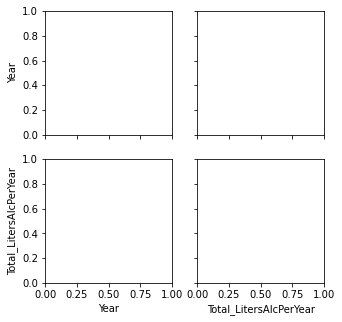

In [50]:
import seaborn as sns

sns.pairplot(df[['Year', 'Total_LitersAlcPerYear']], hue = 'Region', kind = 'kde')

In [ ]:
!streamlit run "app/streamlit_app.py"

In [ ]:
sns.boxplot(data = df, x = 'Total_LitersAlcPerYear')

In [ ]:
dfrel.MajorReligion.value_counts().head(6)